In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))


  Using cached PyYAML-5.1.tar.gz (274 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
fatal: destination path 'detectron2' already exists and is not an empty directory.
Ignoring dataclasses: markers 'python_version < "3.7"' don't match your environment


In [3]:

import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)






import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog





from detectron2.data.datasets import register_coco_instances

register_coco_instances("my_dataset_train", {}, "/content/drive/MyDrive/00000/Sat_Data/images/merged_train_images/merged_train_annotations.json",
                        "/content/drive/MyDrive/00000/Sat_Data/images/merged_train_images")

register_coco_instances("my_dataset_val", {}, "/content/drive/MyDrive/00000/Sat_Data/images/merged_val_images/merged_val_annotations.json",
                        "/content/drive/MyDrive/00000/Sat_Data/images/merged_val_images")



train_metadata = MetadataCatalog.get("my_dataset_train")
train_dataset_dicts = DatasetCatalog.get("my_dataset_train")



val_metadata = MetadataCatalog.get("my_dataset_val")
val_dataset_dicts = DatasetCatalog.get("my_dataset_val")





nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.5 ; cuda:  cu121
detectron2: 0.6
WARNING [11/09 19:52:45 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/09 19:52:45 d2.data.datasets.coco]: Loaded 184 images in COCO format from /content/drive/MyDrive/00000/Sat_Data/images/merged_train_images/merged_train_annotations.json
WARNING [11/09 19:52:45 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/09 19:52:45 d2.data.datasets.coco]: Loaded 62 images in COCO format from /content/drive/MyDrive/00000/Sat_Data/images/merged_val_images/merged_val_annotations.json


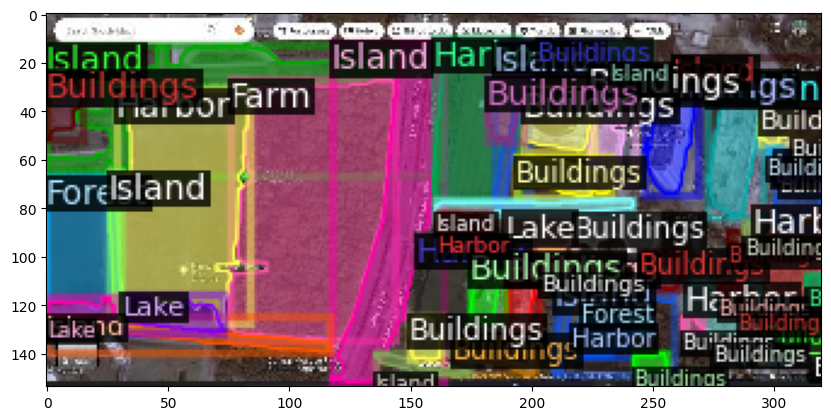

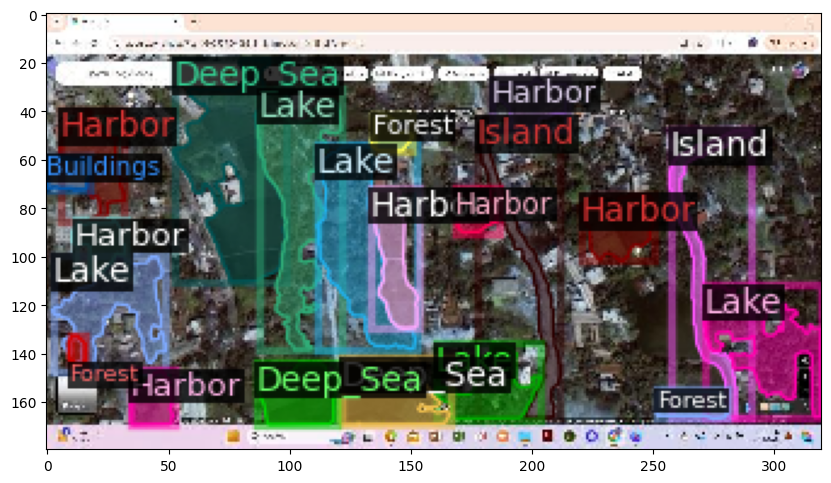

In [4]:
from matplotlib import pyplot as plt

for d in random.sample(train_dataset_dicts, 2):
  plt.figure(figsize=(10, 8))
  img = cv2.imread(d["file_name"])
  visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=0.5)
  vis = visualizer.draw_dataset_dict(d)
  plt.imshow(vis.get_image()[:, :, ::-1])
  plt.show()

[11/09 19:52:48 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[11/09 19:52:49 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[11/09 19:53:06 d2.utils.events]:  eta: 0:04:37  iter: 19  total_loss: 5.811  loss_cls: 3.026  loss_box_reg: 0.6261  loss_mask: 0.6931  loss_rpn_cls: 1.272  loss_rpn_loc: 0.2779    time: 0.6604  last_time: 0.6545  data_time: 0.1189  last_data_time: 0.0792   lr: 1.0566e-05  max_mem: 2712M
[11/09 19:53:23 d2.utils.events]:  eta: 0:04:23  iter: 39  total_loss: 5.342  loss_cls: 2.841  loss_box_reg: 0.6384  loss_mask: 0.6928  loss_rpn_cls: 0.8406  loss_rpn_loc: 0.3082    time: 0.6483  last_time: 0.6557  data_time: 0.0436  last_data_time: 0.0062   lr: 2.1424e-05  max_mem: 2712M
[11/09 19:53:36 d2.utils.events]:  eta: 0:04:10  iter: 59  total_loss: 4.667  loss_cls: 2.52  loss_box_reg: 0.6835  loss_mask: 0.6918  loss_rpn_cls: 0.4379  loss_rpn_loc: 0.3059    time: 0.6392  last_time: 0.5867  data_time: 0.0376  last_data_time: 0.0158   lr: 3.2283e-05  max_mem: 3072M
[11/09 19:53:49 d2.utils.events]:  eta: 0:03:58  iter: 79  total_loss: 3.874  loss_cls: 1.954  loss_box_reg: 0.6213  loss_mask: 0.69

/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

[11/09 19:57:40 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [11/09 19:57:41 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/09 19:57:41 d2.data.datasets.coco]: Loaded 62 images in COCO format from /content/drive/MyDrive/00000/Sat_Data/images/merged_val_images/merged_val_annotations.json
[11/09 19:57:41 d2.data.build]: Distribution of instances among all 15 categories:
|   category    | #instances   |  category   | #instances   |  category  | #instances   |
|:-------------:|:-------------|:-----------:|:-------------|:----------:|:-------------|
| Buildings-T.. | 0            |  Buildings  | 860          |  Deep_Sea  | 1085         |
|     Farm      | 51           |   Forest    | 264          |   Harbor   | 143          |
|     Hill      | 230          |   Island    | 473          |    Lake    | 157          |
|  Open_Place   | 54           |    River    | 7

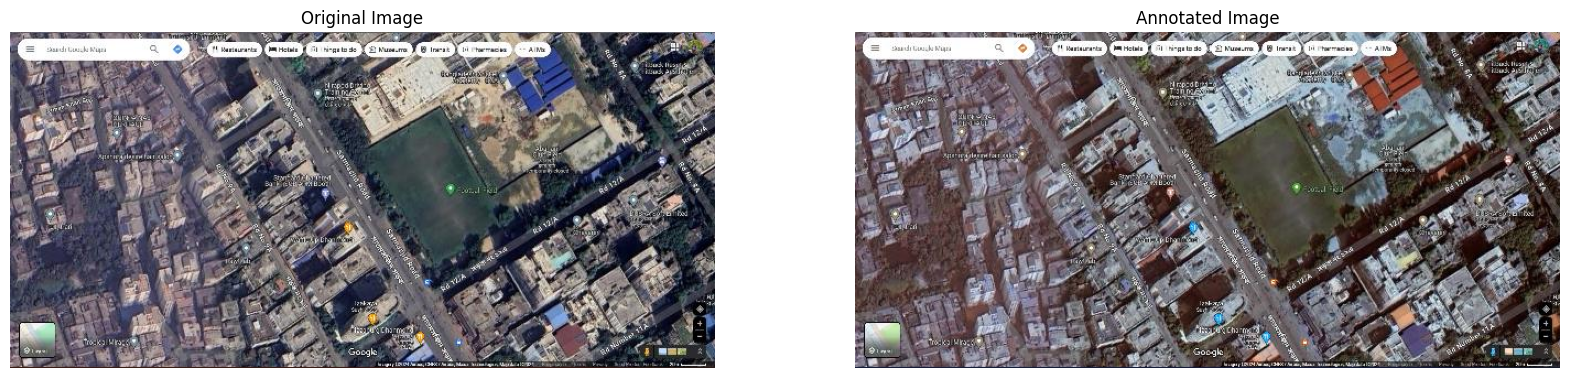

In [5]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
cfg.OUTPUT_DIR = "/content/Detectron2_Models"
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025


#cfg.SOLVER.MAX_ITER = 1000

# Calculate the number of iterations needed for the desired number of epochs
desired_number_of_epochs = 5
num_images = len(train_dataset_dicts)
iterations_per_epoch = num_images // cfg.SOLVER.IMS_PER_BATCH
cfg.SOLVER.MAX_ITER = iterations_per_epoch * desired_number_of_epochs


cfg.SOLVER.STEPS = []
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256
cfg.MODEL.ROI_HEADS.NUM_CLASSES =20

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)



trainer.train()





import yaml
config_yaml_path = "/content/Detectron2_Models/config.yaml"
with open(config_yaml_path, 'w') as file:
    yaml.dump(cfg, file)





cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8
predictor = DefaultPredictor(cfg)


from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("my_dataset_val", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "my_dataset_val")
print(inference_on_dataset(predictor.model, val_loader, evaluator))





import cv2
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer

# Load Image
new_im = cv2.imread("/content/drive/MyDrive/00000/Sat_Data/images/merged_train_images/Abahani-Field_png.rf.3f78f820459a90776d276cd92a05b611.jpg")
outputs = predictor(new_im)

# Visualization
v = Visualizer(new_im[:, :, ::-1], metadata=train_metadata)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# Convert images to RGB for displaying with Matplotlib
new_im_rgb = cv2.cvtColor(new_im, cv2.COLOR_BGR2RGB)
out_img_rgb = out.get_image()[:, :, ::-1]

# Plotting the images side by side using Matplotlib
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].imshow(new_im_rgb)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(out_img_rgb)
ax[1].set_title("Annotated Image")
ax[1].axis("off")

plt.show()


[11/09 20:00:37 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_a3ec72.pkl: 254MB [00:00, 255MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[11/09 20:00:39 d2.engine.train_loop]: Starting training from iteration 0
[11/09 20:00:54 d2.utils.events]:  eta: 0:11:52  iter: 19  total_loss: 6.343  loss_cls: 2.928  loss_box_reg: 0.5561  loss_mask: 0.6931  loss_rpn_cls: 1.786  loss_rpn_loc: 0.2507    time: 0.7797  last_time: 0.7404  data_time: 0.0248  last_data_time: 0.0059   lr: 5.4079e-06  max_mem: 3904M
[11/09 20:01:11 d2.utils.events]:  eta: 0:11:50  iter: 39  total_loss: 5.397  loss_cls: 2.819  loss_box_reg: 0.6316  loss_mask: 0.6928  loss_rpn_cls: 1.049  loss_rpn_loc: 0.3001    time: 0.7998  last_time: 0.8453  data_time: 0.0098  last_data_time: 0.0065   lr: 1.0837e-05  max_mem: 4315M
[11/09 20:01:27 d2.utils.events]:  eta: 0:11:46  iter: 59  total_loss: 4.993  loss_cls: 2.658  loss_box_reg: 0.6459  loss_mask: 0.6924  loss_rpn_cls: 0.6847  loss_rpn_loc: 0.3142    time: 0.8037  last_time: 0.7068  data_time: 0.0105  last_data_time: 0.0059   lr: 1.6267e-05  max_mem: 4315M
[11/09 20:01:43 d2.utils.events]:  eta: 0:11:32  iter: 79 

/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

[11/09 20:13:24 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [11/09 20:13:25 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/09 20:13:25 d2.data.datasets.coco]: Loaded 62 images in COCO format from /content/drive/MyDrive/00000/Sat_Data/images/merged_val_images/merged_val_annotations.json
[11/09 20:13:25 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[11/09 20:13:25 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[11/09 20:13:25 d2.data.common]: Serializing 62 elements to byte tensors and concatenating them all ...
[11/09 20:13:25 d2.data.common]: Serialized dataset takes 1.66 MiB
[11/09 20:13:25 d2.evaluation.evaluator]: Start inference on 62 batches
[11/09 20:13:27 d2.evaluation.evaluator]:

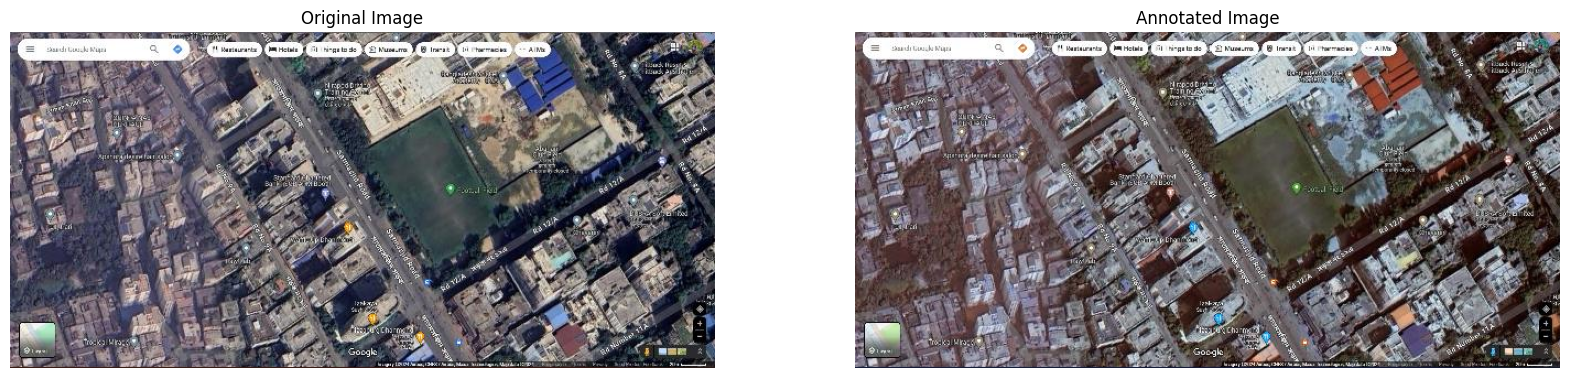

In [6]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
cfg.OUTPUT_DIR = "/content/Detectron2_Models"
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025


#cfg.SOLVER.MAX_ITER = 1000

# Calculate the number of iterations needed for the desired number of epochs
desired_number_of_epochs = 10
num_images = len(train_dataset_dicts)
iterations_per_epoch = num_images // cfg.SOLVER.IMS_PER_BATCH
cfg.SOLVER.MAX_ITER = iterations_per_epoch * desired_number_of_epochs


cfg.SOLVER.STEPS = []
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256
cfg.MODEL.ROI_HEADS.NUM_CLASSES =20

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)



trainer.train()





import yaml
config_yaml_path = "/content/Detectron2_Models/config.yaml"
with open(config_yaml_path, 'w') as file:
    yaml.dump(cfg, file)





cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8
predictor = DefaultPredictor(cfg)


from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("my_dataset_val", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "my_dataset_val")
print(inference_on_dataset(predictor.model, val_loader, evaluator))





import cv2
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer

# Load Image
new_im = cv2.imread("/content/drive/MyDrive/00000/Sat_Data/images/merged_train_images/Abahani-Field_png.rf.3f78f820459a90776d276cd92a05b611.jpg")
outputs = predictor(new_im)

# Visualization
v = Visualizer(new_im[:, :, ::-1], metadata=train_metadata)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# Convert images to RGB for displaying with Matplotlib
new_im_rgb = cv2.cvtColor(new_im, cv2.COLOR_BGR2RGB)
out_img_rgb = out.get_image()[:, :, ::-1]

# Plotting the images side by side using Matplotlib
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].imshow(new_im_rgb)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(out_img_rgb)
ax[1].set_title("Annotated Image")
ax[1].axis("off")

plt.show()


[11/09 20:44:27 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[11/09 20:44:28 d2.engine.train_loop]: Starting training from iteration 0
[11/09 20:45:17 d2.utils.events]:  eta: 0:57:01  iter: 19  total_loss: 6.692  loss_cls: 2.953  loss_box_reg: 0.574  loss_mask: 0.694  loss_rpn_cls: 2.269  loss_rpn_loc: 0.3067    time: 2.4346  last_time: 2.1559  data_time: 0.0256  last_data_time: 0.0116   lr: 4.9953e-06  max_mem: 8496M
[11/09 20:46:04 d2.utils.events]:  eta: 0:53:58  iter: 39  total_loss: 5.853  loss_cls: 2.916  loss_box_reg: 0.6264  loss_mask: 0.6931  loss_rpn_cls: 1.302  loss_rpn_loc: 0.2811    time: 2.3877  last_time: 2.3838  data_time: 0.0137  last_data_time: 0.0202   lr: 9.9902e-06  max_mem: 8496M
[11/09 20:46:54 d2.utils.events]:  eta: 0:54:59  iter: 59  total_loss: 5.142  loss_cls: 2.809  loss_box_reg: 0.6692  loss_mask: 0.6924  loss_rpn_cls: 0.6732  loss_rpn_loc: 0.2876    time: 2.4200  last_time: 2.5238  data_time: 0.0127  last_data_time: 0.0199   lr: 1.4985e-05  max_mem: 8496M
[11/09 20:47:42 d2.utils.events]:  eta: 0:54:03  iter: 79  t

/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

[11/09 21:39:56 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [11/09 21:39:56 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/09 21:39:56 d2.data.datasets.coco]: Loaded 62 images in COCO format from /content/drive/MyDrive/00000/Sat_Data/images/merged_val_images/merged_val_annotations.json
[11/09 21:39:56 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[11/09 21:39:56 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[11/09 21:39:56 d2.data.common]: Serializing 62 elements to byte tensors and concatenating them all ...
[11/09 21:39:56 d2.data.common]: Serialized dataset takes 1.66 MiB
[11/09 21:39:56 d2.evaluation.evaluator]: Start inference on 62 batches
[11/09 21:39:59 d2.evaluation.evaluator]:

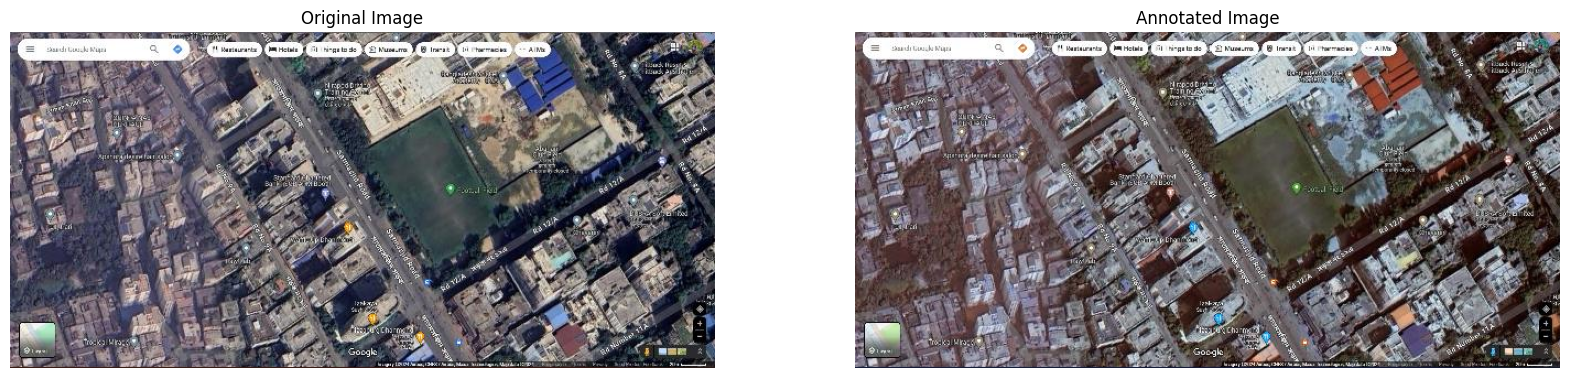

In [ ]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
cfg.OUTPUT_DIR = "/content/Detectron2_Models"
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025


#cfg.SOLVER.MAX_ITER = 1000

# Calculate the number of iterations needed for the desired number of epochs
desired_number_of_epochs = 15
num_images = len(train_dataset_dicts)
iterations_per_epoch = num_images // cfg.SOLVER.IMS_PER_BATCH
cfg.SOLVER.MAX_ITER = iterations_per_epoch * desired_number_of_epochs


cfg.SOLVER.STEPS = []
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256
cfg.MODEL.ROI_HEADS.NUM_CLASSES =20

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)



trainer.train()





import yaml
config_yaml_path = "/content/Detectron2_Models/config.yaml"
with open(config_yaml_path, 'w') as file:
    yaml.dump(cfg, file)





cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8
predictor = DefaultPredictor(cfg)


from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("my_dataset_val", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "my_dataset_val")
print(inference_on_dataset(predictor.model, val_loader, evaluator))





import cv2
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer

# Load Image
new_im = cv2.imread("/content/drive/MyDrive/00000/Sat_Data/images/merged_train_images/Abahani-Field_png.rf.3f78f820459a90776d276cd92a05b611.jpg")
outputs = predictor(new_im)

# Visualization
v = Visualizer(new_im[:, :, ::-1], metadata=train_metadata)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# Convert images to RGB for displaying with Matplotlib
new_im_rgb = cv2.cvtColor(new_im, cv2.COLOR_BGR2RGB)
out_img_rgb = out.get_image()[:, :, ::-1]

# Plotting the images side by side using Matplotlib
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].imshow(new_im_rgb)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(out_img_rgb)
ax[1].set_title("Annotated Image")
ax[1].axis("off")

plt.show()
